<a href="https://colab.research.google.com/github/GuariJuan/FIA2023-TPI/blob/main/FIA2023_TPI_GUARI_JUAN_PABLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PRACTICOS ANTERIORES

TP5: https://github.com/GuariJuan/FIA-TP5/tree/develop

TP5-Parte-2: https://github.com/GuariJuan/FIA-TP5-P2

TP6: https://github.com/GuariJuan/FIA-TP6

TRABAJO PRACTICO INTEGRADOR

#1. Crear un repositorio llamado FIA2023-TPI
2. Crear un notebook en Google Colab y guardarlo como FIA2023-TPI

INTALAMOS TODAS LAS LIBRERIAS NECESARIAS


In [2]:
install.packages('lubridate') #para fechas
install.packages('ggplot2') #para graficos
install.packages('ggdist') #para histograma
install.packages("e1071")#svm
install.packages("randomForest") #randomForest
install.packages("clock") #necesaria para instalar 'caret'
install.packages("caret") #para el particionado del df
install.packages("fastDummies") #para realizar el casteo (one-hot encoding)
install.packages('neuralnet')
install.packages('NeuralNetTools')
install.packages('gridExtra')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘distributional’, ‘numDeriv’, ‘quadprog’, ‘Rcpp’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘iterators’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing pack

IMPORTAMOS LAS LIBRERIAS

In [3]:
library(lubridate)
library(ggplot2)
library(ggdist)
library(dplyr)
library(e1071)
library(randomForest)
library(caret)
library(reshape2)
library(fastDummies)
library(neuralnet)
library(NeuralNetTools)
library(gridExtra)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin


Loading required package: lattice

Thank you for using fastDummies!

To acknowledge our work, please cite the package:

Kaplan, J. & Schlegel, B. (2023). fastDummies: Fast Creation of Dummy (Binary) Columns and Rows from Categorical Variables. Version 1.7.1. URL: https://github.com/jacobkap/fastDummies, https://jacobkap.github.io/fastDummies/.


Attaching package: ‘neuralnet’


The following object is masked from ‘pack

#3. Cargar los archivos princess.csv y wine.csv en dos dataframes de R y explorarlos.

CARGA DE DATAFRAMES

In [4]:
# Leer los archivos CSV y almacenarlos en dataframes
princess_df <- read.csv("princess.csv")
wine_df <- read.csv("wine.csv")

EXPLORACION DE DATAFRAMES

In [5]:
# Visualizar las primeras filas de cada dataframe
head(princess_df)
head(wine_df)

# OBSERVACION:Observo que el label del segundo dataframe "wine_df" no es de tipo numerico por lo que para
## trabajar con el sera necesario convetirlo a tipo numerico. Otra observacion es la cantidad de variables que tiene cada dataframe observando a simple vista que la segunda tiene
### menor cantidad.

,Phoenix.Feather,Unicorn.Horn,Dragon.s.Blood,Mermaid.Tears,Fairy.Dust,Goblin.Toes,Witch.s.Brew,Griffin.Claw,Troll.Hair,Kraken.Ink,Minotaur.Horn,Basilisk.Scale,Chimera.Fang,Cured
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,2.4,18.7,18.4,27.9,7.9,9.6,18.3,13.2,2.5,26.0,10.5,26.2,12.5,0
2,2.1,6.0,15.0,13.3,15.6,13.1,11.0,5.0,7.2,26.0,1.5,13.3,6.2,0
3,17.2,13.9,23.8,6.8,10.7,15.8,19.4,2.7,15.4,21.2,11.1,16.6,11.4,1
4,8.4,9.7,6.8,26.9,4.6,29.1,14.6,19.7,18.0,20.8,13.6,13.9,8.1,1
5,22.1,10.8,16.4,10.5,22.0,23.4,2.6,18.2,23.8,11.3,5.5,16.8,16.2,0
6,21.9,5.5,11.5,5.0,27.9,20.9,20.5,22.7,33.9,7.4,3.6,38.4,5.2,1


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,bad
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,bad
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,bad
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,good
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,bad
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,bad


In [6]:
# Obtener la estructura de los datos
str(princess_df)
str(wine_df)

# OBSERVACION: Verificando la observacion anterior vemos que el 2° dataframe tiene 12 columnas y un total de 1599 filas. Mientras
## que el 1° tiene 14 columnas y 2338 filas.

'data.frame':	2338 obs. of  14 variables:
 $ Phoenix.Feather: num  2.4 2.1 17.2 8.4 22.1 21.9 30 16.4 28.4 11.8 ...
 $ Unicorn.Horn   : num  18.7 6 13.9 9.7 10.8 5.5 8.6 12.1 18.9 17.7 ...
 $ Dragon.s.Blood : num  18.4 15 23.8 6.8 16.4 11.5 29.1 14.2 30.3 8.8 ...
 $ Mermaid.Tears  : num  27.9 13.3 6.8 26.9 10.5 5 26 22 5.6 22.9 ...
 $ Fairy.Dust     : num  7.9 15.6 10.7 4.6 22 27.9 18.6 15.6 18 6.1 ...
 $ Goblin.Toes    : num  9.6 13.1 15.8 29.1 23.4 20.9 13.8 10.4 9.9 5.8 ...
 $ Witch.s.Brew   : num  18.3 11 19.4 14.6 2.6 20.5 3.8 11.7 6.2 15.7 ...
 $ Griffin.Claw   : num  13.2 5 2.7 19.7 18.2 22.7 19.1 18.4 24.4 2.6 ...
 $ Troll.Hair     : num  2.5 7.2 15.4 18 23.8 33.9 42.3 21 14.4 16.5 ...
 $ Kraken.Ink     : num  26 26 21.2 20.8 11.3 7.4 17.3 20.3 2.7 23.7 ...
 $ Minotaur.Horn  : num  10.5 1.5 11.1 13.6 5.5 3.6 16.8 4 15.1 25.2 ...
 $ Basilisk.Scale : num  26.2 13.3 16.6 13.9 16.8 38.4 16.3 15.7 41.6 1.7 ...
 $ Chimera.Fang   : num  12.5 6.2 11.4 8.1 16.2 5.2 4.5 15.3 7 1.1 ...
 $

In [7]:
#Resumen estadístico para cada columna
summary(princess_df)
summary(wine_df)

# OBSERVACION: Aqui para ambos dataframes se observan las estadisticas correspondientes; En cuanto al primer dataframe
## no hay algo que me pareza extraño por ejemplo podria analizar valores min o max para dedos de los pies de duendes, pero
### al no tener mas informacion no puedo asegurar nada; En cuanto al segundo dataframe puedo observar valores normales y
#### mas familiares para mi.

 Phoenix.Feather  Unicorn.Horn   Dragon.s.Blood  Mermaid.Tears  
 Min.   : 1.00   Min.   : 1.00   Min.   : 1.00   Min.   : 1.00  
 1st Qu.: 8.50   1st Qu.: 5.30   1st Qu.: 9.60   1st Qu.: 7.60  
 Median :14.70   Median : 9.50   Median :15.80   Median :13.10  
 Mean   :15.37   Mean   :10.95   Mean   :16.12   Mean   :13.63  
 3rd Qu.:21.30   3rd Qu.:15.57   3rd Qu.:22.00   3rd Qu.:19.00  
 Max.   :42.10   Max.   :34.10   Max.   :40.80   Max.   :35.80  
   Fairy.Dust      Goblin.Toes     Witch.s.Brew     Griffin.Claw  
 Min.   : 1.000   Min.   : 1.00   Min.   : 1.000   Min.   : 1.00  
 1st Qu.: 8.625   1st Qu.: 7.90   1st Qu.: 6.325   1st Qu.: 8.40  
 Median :14.500   Median :13.50   Median :11.200   Median :14.40  
 Mean   :15.069   Mean   :14.16   Mean   :12.329   Mean   :14.91  
 3rd Qu.:20.700   3rd Qu.:19.50   3rd Qu.:16.900   3rd Qu.:20.50  
 Max.   :40.400   Max.   :37.80   Max.   :37.300   Max.   :39.40  
   Troll.Hair      Kraken.Ink    Minotaur.Horn   Basilisk.Scale 
 Min.   : 1

 fixed.acidity   volatile.acidity  citric.acid    residual.sugar  
 Min.   : 4.60   Min.   :0.1200   Min.   :0.000   Min.   : 0.900  
 1st Qu.: 7.10   1st Qu.:0.3900   1st Qu.:0.090   1st Qu.: 1.900  
 Median : 7.90   Median :0.5200   Median :0.260   Median : 2.200  
 Mean   : 8.32   Mean   :0.5278   Mean   :0.271   Mean   : 2.539  
 3rd Qu.: 9.20   3rd Qu.:0.6400   3rd Qu.:0.420   3rd Qu.: 2.600  
 Max.   :15.90   Max.   :1.5800   Max.   :1.000   Max.   :15.500  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.01200   Min.   : 1.00       Min.   :  6.00       Min.   :0.9901  
 1st Qu.:0.07000   1st Qu.: 7.00       1st Qu.: 22.00       1st Qu.:0.9956  
 Median :0.07900   Median :14.00       Median : 38.00       Median :0.9968  
 Mean   :0.08747   Mean   :15.87       Mean   : 46.47       Mean   :0.9967  
 3rd Qu.:0.09000   3rd Qu.:21.00       3rd Qu.: 62.00       3rd Qu.:0.9978  
 Max.   :0.61100   Max.   :72.00       Max.   :289.00       Max.   :1

In [8]:
#Numero de filas y columnas
nrow(princess_df)
ncol(princess_df)

nrow(wine_df)
ncol(wine_df)

[1] 2338

[1] 14

[1] 1599

[1] 12

#4. Elección del dataset y justificación



Mi elección entre "princess" y "wine" va a ser por el segundo, ya que los variables que se utilizan me resultan más familiares y por ende puedo hacer un análisis de cada una con mas facilidad. Además, la cantidad de datos del segundo es menor, tanto en cantidad de variables como en cantidad de observaciones. Por último analizando el label del primero observo que es de tipo continuo, es decir un rango de valores que va desde el 0 al 1 refiriéndose al grado de efectividad de los componentes, en conjunto, esto implicaría establecer un punto medio; por lo cual optare por el segundo dataframe "wine" ya que su label es de tipo categórico y con hacer un casteo, es decir, pasaje a tipo numérico, podre trabajar con él sin problemas.

# 5. Si fuera necesario imputar valores faltantes, tratar outliers y valores duplicados.

Verifico si hay valores faltantes en cada dataframe

In [9]:
#colSums(is.na(princess_df))
colSums(is.na(wine_df))

# OBVERVACION: En ninguno de las variables/columnas existen valores faltantes.

fixed.acidity     volatile.acidity          citric.acid 
                   0                    0                    0 
      residual.sugar            chlorides  free.sulfur.dioxide 
                   0                    0                    0 
total.sulfur.dioxide              density                   pH 
                   0                    0                    0 
           sulphates              alcohol              quality 
                   0                    0                    0

Verifico outliers

In [10]:
# para esto voy a analizar que tan dispersos estan los datos analizando la varianza y la desviacion estandar
varianza_columnas = apply(wine_df, 2, var)
desviacion_columnas = apply(wine_df, 2, sd)
#boxplot(princess_df$variable_con_outliers)

Warning message in FUN(newX[, i], ...):
“NAs introduced by coercion”
Warning message in var(if (is.vector(x) || is.factor(x)) x else as.double(x), na.rm = na.rm):
“NAs introduced by coercion”


In [11]:
# como me da error es necesario tranformar la variable categorica (quality) a numerica.
wine_df$is_good = ifelse(wine_df$quality == "good", 1, 0)

# ahora elimino la columna anterior quality
wine_df = subset(wine_df, select = -quality)

In [12]:
# muestro como queda el dataframe
head(wine_df)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,is_good
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,0
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,0
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,0
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,1
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,0
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,0


In [13]:
# Volvemos Calcular la varianza y la desviación estándar para cada columna en el DataFrame wine_df
varianzas <- apply(wine_df, 2, var) # Calcula la varianza para cada columna
desviaciones_estandar <- apply(wine_df, 2, sd) # Calcula la desviación estándar para cada columna

# Mostrar los resultados
names(varianzas) <- colnames(wine_df) # Asignar nombres de columnas a las varianzas
names(desviaciones_estandar) <- colnames(wine_df) # Asignar nombres de columnas a las desviaciones estándar

# Mostrar resultados de varianzas
cat("Varianzas:\n")
print(varianzas)

# Mostrar resultados de desviaciones estándar
cat("\nDesviaciones estándar:\n")
print(desviaciones_estandar)

#OBSERVACION: analizando las desviaciones y las varianzas se observa que "total.sulfur.dioxide" y "free.sulfur.dioxide" son las variables
## que mayor desviacion estandar tienen, esto indica que los datos estan mas dispersos, por ende es posible que exitan valores outliers en estas columnas.


Varianzas:
       fixed.acidity     volatile.acidity          citric.acid 
        3.031416e+00         3.206238e-02         3.794748e-02 
      residual.sugar            chlorides  free.sulfur.dioxide 
        1.987897e+00         2.215143e-03         1.094149e+02 
total.sulfur.dioxide              density                   pH 
        1.082102e+03         3.562029e-06         2.383518e-02 
           sulphates              alcohol              is_good 
        2.873262e-02         1.135647e+00         2.489510e-01 

Desviaciones estándar:
       fixed.acidity     volatile.acidity          citric.acid 
         1.741096318          0.179059704          0.194801137 
      residual.sugar            chlorides  free.sulfur.dioxide 
         1.409928060          0.047065302         10.460156970 
total.sulfur.dioxide              density                   pH 
        32.895324478          0.001887334          0.154386465 
           sulphates              alcohol              is_good 
     

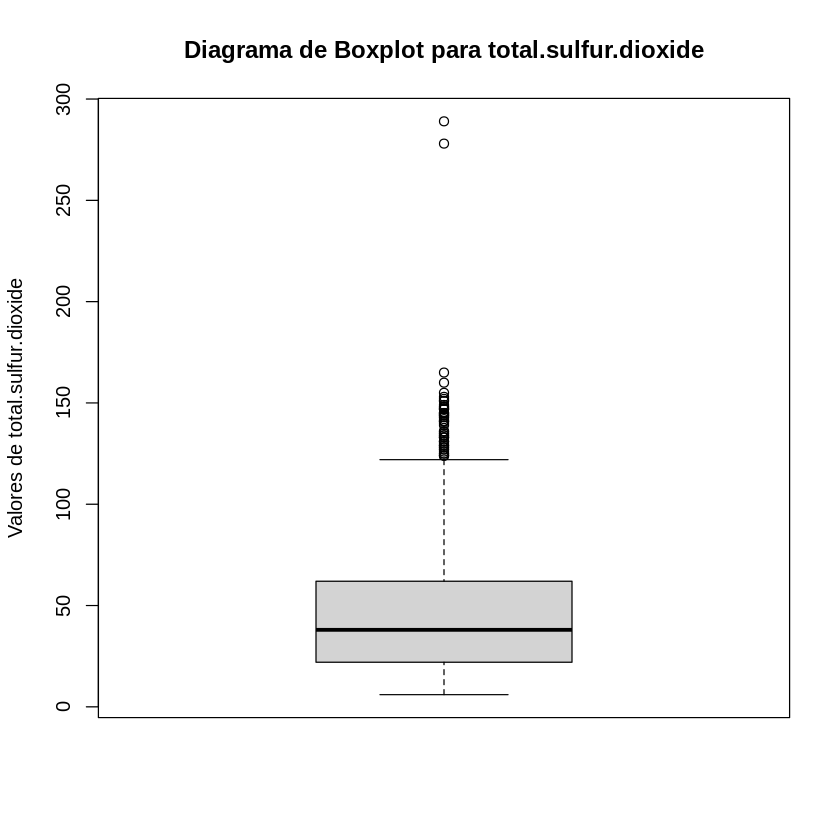

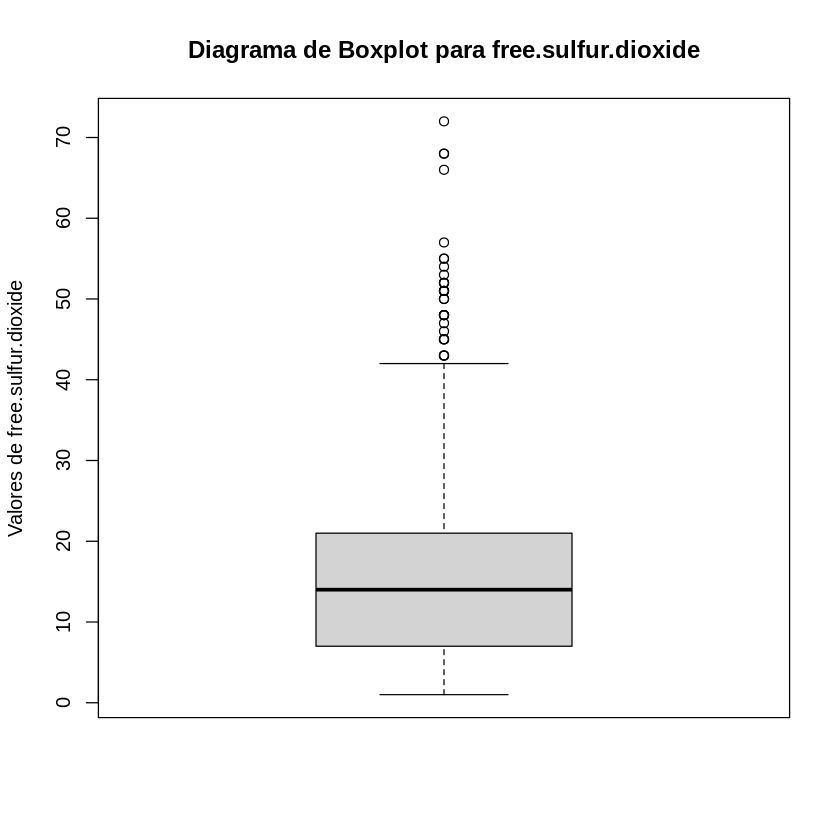

In [14]:
# Crear un boxplot para la columna "total.sulfur.dioxide"
boxplot(wine_df$total.sulfur.dioxide,
        main = "Diagrama de Boxplot para total.sulfur.dioxide",
        ylab = "Valores de total.sulfur.dioxide")

# Crear un boxplot para la columna "free.sulfur.dioxide"
boxplot(wine_df$free.sulfur.dioxide,
        main = "Diagrama de Boxplot para free.sulfur.dioxide",
        ylab = "Valores de free.sulfur.dioxide")

# OBSERVACION:mediante el grafico de boxplot podemos observar que efectivamente
## existen valores atipicos, los cuales sera necesario eliminar.

ELIMINAMOS OUTLIERS

In [15]:
# Calcular el rango intercuartílico (IQR) de la columna "free.sulfur.dioxide"
Q1_free <- quantile(wine_df$free.sulfur.dioxide, 0.25)
Q3_free <- quantile(wine_df$free.sulfur.dioxide, 0.75)
IQR_value_free <- Q3_free - Q1_free

# Definir los límites para identificar los valores atípicos en "free.sulfur.dioxide"
lower_limit_free <- Q1_free - 1.5 * IQR_value_free
upper_limit_free <- Q3_free + 1.5 * IQR_value_free

# Crear un nuevo DataFrame sin valores atípicos en la columna "free.sulfur.dioxide"
wine_df_sin_outliers_free <- wine_df[wine_df$free.sulfur.dioxide >= lower_limit_free & wine_df$free.sulfur.dioxide <= upper_limit_free, ]

# Calcular el rango intercuartílico (IQR) de la columna "total.sulfur.dioxide"
Q1_total <- quantile(wine_df$total.sulfur.dioxide, 0.25)
Q3_total <- quantile(wine_df$total.sulfur.dioxide, 0.75)
IQR_value_total <- Q3_total - Q1_total

# Definir los límites para identificar los valores atípicos en "total.sulfur.dioxide"
lower_limit_total <- Q1_total - 1.5 * IQR_value_total
upper_limit_total <- Q3_total + 1.5 * IQR_value_total

# Crear un nuevo DataFrame sin valores atípicos en la columna "total.sulfur.dioxide"
wine_df_sin_outliers_total <- wine_df[wine_df$total.sulfur.dioxide >= lower_limit_total & wine_df$total.sulfur.dioxide <= upper_limit_total, ]


In [16]:
#Comparo la cantidad de observaciones
nrow(wine_df)
nrow(wine_df_sin_outliers_total)

[1] 1599

[1] 1544

In [17]:
head(wine_df_sin_outliers_total)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,is_good
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,0
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,0
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,0
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,1
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,0
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,0


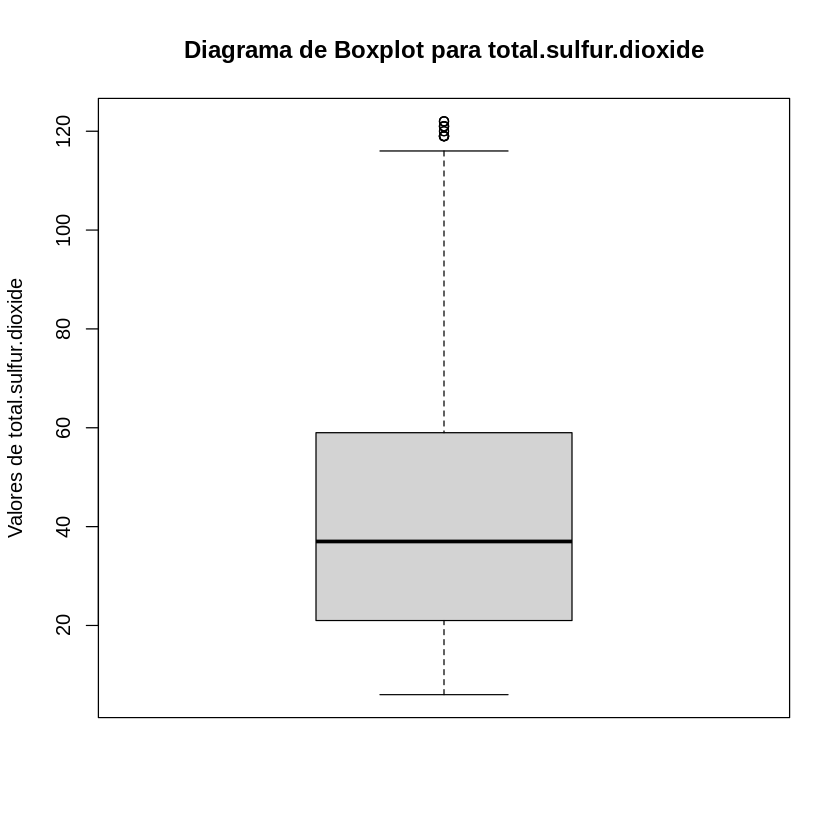

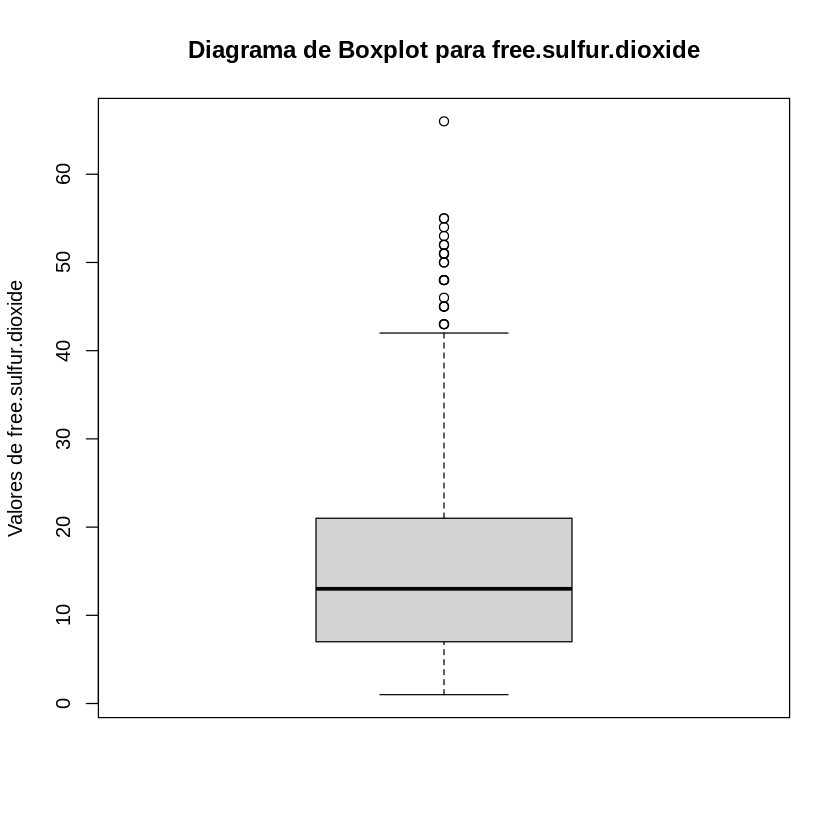

In [18]:
#vuelvo a generar boxplot para ver resultados
# Crear un boxplot para la columna "total.sulfur.dioxide"
boxplot(wine_df_sin_outliers_total$total.sulfur.dioxide,
        main = "Diagrama de Boxplot para total.sulfur.dioxide",
        ylab = "Valores de total.sulfur.dioxide")

# Crear un boxplot para la columna "free.sulfur.dioxide"
boxplot(wine_df_sin_outliers_total$free.sulfur.dioxide,
        main = "Diagrama de Boxplot para free.sulfur.dioxide",
        ylab = "Valores de free.sulfur.dioxide")

In [19]:
# Volvemos Calcular la varianza y la desviación estándar para cada columna en el DataFrame wine_df_sin_outliers_total
varianzas <- apply(wine_df_sin_outliers_total, 2, var) # Calcula la varianza para cada columna
desviaciones_estandar <- apply(wine_df_sin_outliers_total, 2, sd) # Calcula la desviación estándar para cada columna

# Mostrar los resultados
names(varianzas) <- colnames(wine_df_sin_outliers_total) # Asignar nombres de columnas a las varianzas
names(desviaciones_estandar) <- colnames(wine_df_sin_outliers_total) # Asignar nombres de columnas a las desviaciones estándar

# Mostrar resultados de varianzas
cat("Varianzas:\n")
print(varianzas)

# Mostrar resultados de desviaciones estándar
cat("\nDesviaciones estándar:\n")
print(desviaciones_estandar)

Varianzas:
       fixed.acidity     volatile.acidity          citric.acid 
        3.100337e+00         3.183317e-02         3.841910e-02 
      residual.sugar            chlorides  free.sulfur.dioxide 
        1.825674e+00         2.271783e-03         9.727378e+01 
total.sulfur.dioxide              density                   pH 
        7.406452e+02         3.561062e-06         2.381245e-02 
           sulphates              alcohol              is_good 
        2.476571e-02         1.145221e+00         2.478009e-01 

Desviaciones estándar:
       fixed.acidity     volatile.acidity          citric.acid 
         1.760777406          0.178418520          0.196007896 
      residual.sugar            chlorides  free.sulfur.dioxide 
         1.351175166          0.047663229          9.862746879 
total.sulfur.dioxide              density                   pH 
        27.214796803          0.001887078          0.154312817 
           sulphates              alcohol              is_good 
     

In [20]:
#Reviso estadisticas
summary(wine_df_sin_outliers_total)

 fixed.acidity    volatile.acidity  citric.acid     residual.sugar  
 Min.   : 4.600   Min.   :0.1200   Min.   :0.0000   Min.   : 0.900  
 1st Qu.: 7.100   1st Qu.:0.3900   1st Qu.:0.0900   1st Qu.: 1.900  
 Median : 7.900   Median :0.5200   Median :0.2500   Median : 2.200  
 Mean   : 8.329   Mean   :0.5266   Mean   :0.2690   Mean   : 2.508  
 3rd Qu.: 9.300   3rd Qu.:0.6350   3rd Qu.:0.4225   3rd Qu.: 2.600  
 Max.   :15.900   Max.   :1.5800   Max.   :1.0000   Max.   :15.500  
   chlorides      free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.0120   Min.   : 1.00       Min.   :  6          Min.   :0.9901  
 1st Qu.:0.0700   1st Qu.: 7.00       1st Qu.: 21          1st Qu.:0.9956  
 Median :0.0790   Median :13.00       Median : 37          Median :0.9967  
 Mean   :0.0874   Mean   :15.27       Mean   : 43          Mean   :0.9967  
 3rd Qu.:0.0900   3rd Qu.:21.00       3rd Qu.: 59          3rd Qu.:0.9978  
 Max.   :0.6110   Max.   :66.00       Max.   :122          Ma

In [21]:
#probando otro metodo para eliminar valores atipicos u outliers

# Calcular la media y la desviación estándar de la columna 'total.sulfur.dioxide'
mean_val <- mean(wine_df_sin_outliers_total$total.sulfur.dioxide)
std_dev <- sd(wine_df_sin_outliers_total$total.sulfur.dioxide)

# Definir un umbral para los valores atípicos (puedes ajustar estos valores según tu criterio)
# Por ejemplo, supongamos que consideras valores atípicos aquellos que están más allá de 1.5 desviaciones estándar de la media
threshold <- 0.50 * std_dev

# Crear un nuevo dataframe sin los valores atípicos
df_sin_atipicos <- wine_df_sin_outliers_total[wine_df_sin_outliers_total$total.sulfur.dioxide >= mean_val - threshold & wine_df_sin_outliers_total$total.sulfur.dioxide <= mean_val + threshold, ]


In [22]:
# Volvemos Calcular la varianza y la desviación estándar para cada columna en el DataFrame wine_df_sin_outliers_total
varianzas <- apply(df_sin_atipicos, 2, var) # Calcula la varianza para cada columna
desviaciones_estandar <- apply(df_sin_atipicos, 2, sd) # Calcula la desviación estándar para cada columna

# Mostrar los resultados
names(varianzas) <- colnames(df_sin_atipicos) # Asignar nombres de columnas a las varianzas
names(desviaciones_estandar) <- colnames(df_sin_atipicos) # Asignar nombres de columnas a las desviaciones estándar

# Mostrar resultados de varianzas
cat("Varianzas:\n")
print(varianzas)

# Mostrar resultados de desviaciones estándar
cat("\nDesviaciones estándar:\n")
print(desviaciones_estandar)

Varianzas:
       fixed.acidity     volatile.acidity          citric.acid 
        3.173193e+00         2.576155e-02         3.717163e-02 
      residual.sugar            chlorides  free.sulfur.dioxide 
        1.060712e+00         2.385884e-03         6.255629e+01 
total.sulfur.dioxide              density                   pH 
        5.589708e+01         3.362564e-06         2.358538e-02 
           sulphates              alcohol              is_good 
        1.958755e-02         9.965878e-01         2.417663e-01 

Desviaciones estándar:
       fixed.acidity     volatile.acidity          citric.acid 
          1.78134573           0.16050405           0.19279945 
      residual.sugar            chlorides  free.sulfur.dioxide 
          1.02990862           0.04884551           7.90925319 
total.sulfur.dioxide              density                   pH 
          7.47643504           0.00183373           0.15357534 
           sulphates              alcohol              is_good 
     

In [23]:
nrow(wine_df)
nrow(wine_df_sin_outliers_total)
nrow(df_sin_atipicos)

[1] 1599

[1] 1544

[1] 509

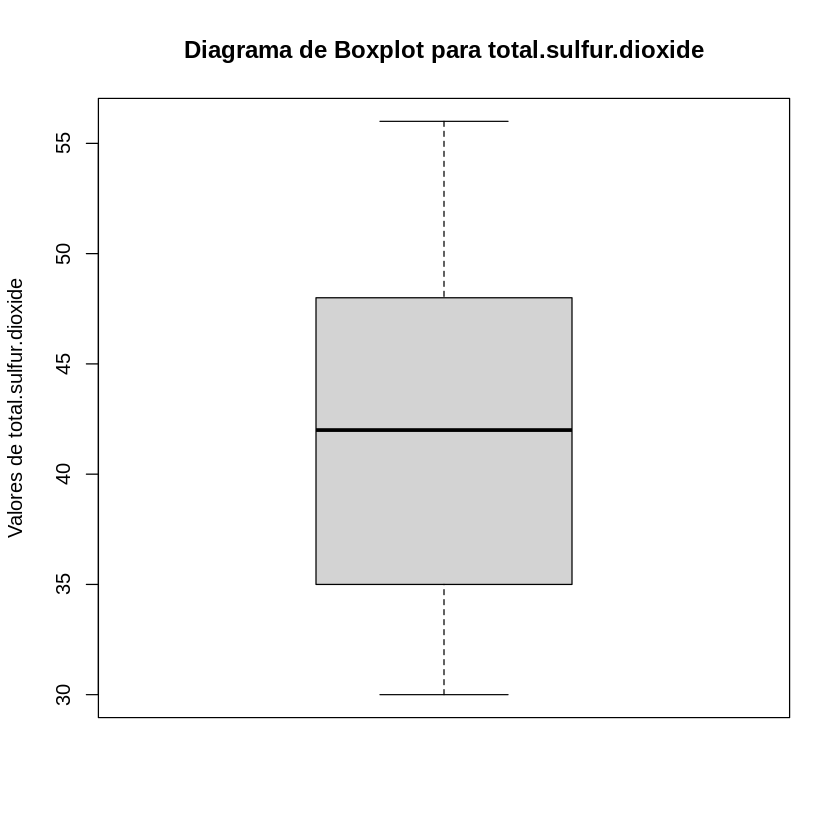

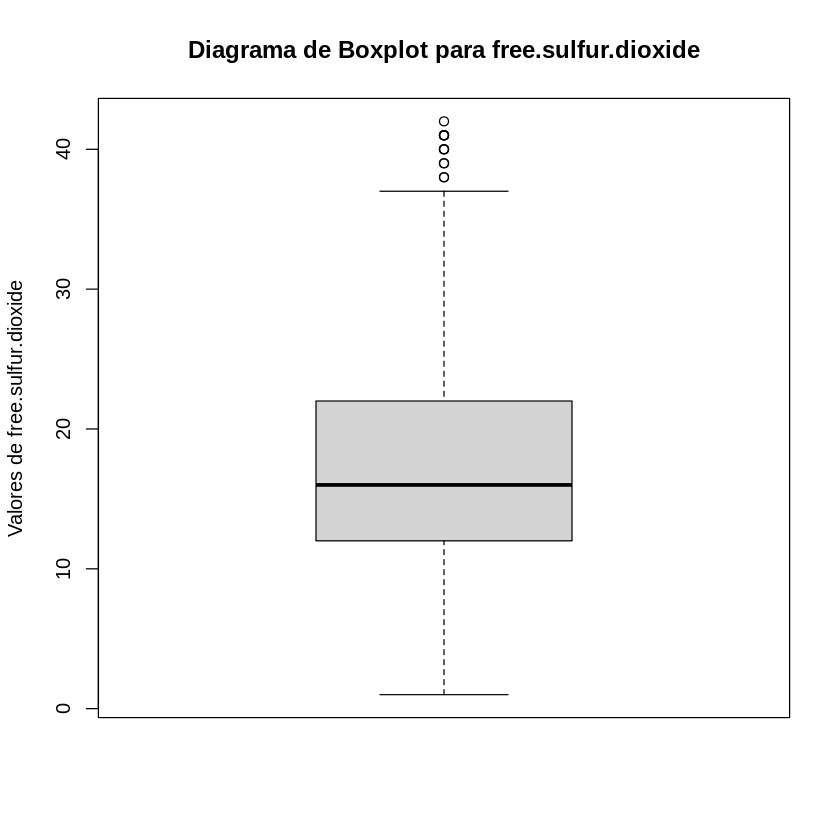

In [24]:
boxplot(df_sin_atipicos$total.sulfur.dioxide,
        main = "Diagrama de Boxplot para total.sulfur.dioxide",
        ylab = "Valores de total.sulfur.dioxide")

# Crear un boxplot para la columna "free.sulfur.dioxide"
boxplot(df_sin_atipicos$free.sulfur.dioxide,
        main = "Diagrama de Boxplot para free.sulfur.dioxide",
        ylab = "Valores de free.sulfur.dioxide")

OBSERVACION: Noto que los valores se corresponden con los graficos de boxplot.
Luego de varias prueba decido eliminar las columnas free.sulfur.dioxide y total.sulfur.dioxide
ya que tienen una desviacion demasiada alta a pesar de haber aplicado metodos para eliminar outliers, ademas si elimino los valores atipicos la cantidad
de observaciones se reduciria bastante.

In [25]:
#ELIMINO free.sulfur.dioxide y total.sulfur.dioxide
wine_df_sin_cols <- subset(wine_df_sin_outliers_total, select = -c(total.sulfur.dioxide, free.sulfur.dioxide))


In [26]:
head(wine_df_sin_cols)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,density,pH,sulphates,alcohol,is_good
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7.4,0.70,0.00,1.9,0.076,0.9978,3.51,0.56,9.4,0
2,7.8,0.88,0.00,2.6,0.098,0.9968,3.20,0.68,9.8,0
3,7.8,0.76,0.04,2.3,0.092,0.9970,3.26,0.65,9.8,0
4,11.2,0.28,0.56,1.9,0.075,0.9980,3.16,0.58,9.8,1
5,7.4,0.70,0.00,1.9,0.076,0.9978,3.51,0.56,9.4,0
6,7.4,0.66,0.00,1.8,0.075,0.9978,3.51,0.56,9.4,0


#6. Chequear desbalanceo del dataset y sugerir alternativas para solucionarlo. Explicar

In [27]:
#Chequeamos desbalanceo
table(wine_df_sin_cols$is_good)

#OBSERVACION: El dataframe esta ligeramente desbalanceado. La clase 0 representa el 45.12% y la clase 1 el 54.88%


  0   1 
697 847 

## **SOLUCIONES AL DESBALANCEO**

### **OPCION 1**

In [28]:
#OPCION 1: elegir 697 filas aleatorias con is_good = 1
# Creamos un subconjunto con las filas con is_good = 1
df_label_1 <- wine_df_sin_cols[wine_df_sin_cols$is_good == 1, ]

# Creamos un subconjunto con las filas con is_good = 0
df_label_0 <- wine_df_sin_cols[wine_df_sin_cols$is_good == 0, ]

# Seleccionamos aleatoriamente 697 filas de la clase 'is_good = 1'
sampled_df_label_1 <- df_label_1[sample(nrow(df_label_1), 697), ]

# Combinamos los subconjuntos de las dos clases en un DataFrame balanceado
df_balanceado <- rbind(sampled_df_label_1, df_label_0)

# Verificamos la distribución de clases en el nuevo DataFrame balanceado
table(df_balanceado$is_good)



  0   1 
697 697 

## **OPCION 2**

In [29]:
#OPCION 2: aumentamos las flas para is_good = 0 primero duplico la clase 0 luego selecciono 847 observaciones.
# Creamos un subconjunto con las filas con label = 0
df_label_0 <- wine_df_sin_cols[wine_df_sin_cols$is_good == 0, ]

# Creamos un subconjunto con las filas con label = 1
df_label_1 <- wine_df_sin_cols[wine_df_sin_cols$is_good == 1, ]

# Duplicamos las observaciones de 'is_good = 0'
duplicated_df_label_0 <- df_label_0[rep(row.names(df_label_0), times = 2), ]

# Seleccionamos aleatoriamente 847 observaciones de las duplicadas 'is_good = 0'
sampled_duplicated_df_label_0 <- duplicated_df_label_0[sample(nrow(duplicated_df_label_0), 847), ]

# Combinamos las observaciones duplicadas con las observaciones de 'is_good = 1'
df_balanceado <- rbind(sampled_duplicated_df_label_0, df_label_1)

# Verificamos la distribución de clases en el nuevo DataFrame balanceado
table(df_balanceado$is_good)



  0   1 
847 847 

## **OPCION 3**

In [30]:
#OPCION 3: trabajamos con el dataset desbalanceado
table(wine_df_sin_cols$is_good)


  0   1 
697 847 

#7.Entrenar tres modelos (SVM, RF y RNA) para resolver el problema. Realice lo que considere necesario para que el aprendizaje de los tres modelos sea lo mejor posible. 8. Realizar las pruebas de los tres modelos.

## **SVM:** PARA ESTE ENTRENAMIENTO VOY A UTILIZAR LA OPCION 1

In [31]:
#OPCION 1:
# Creamos un subconjunto de 697 filas con is_good = 1 al azar
 df_label_1 <- wine_df_sin_cols[wine_df_sin_cols$is_good == 1, ]
 sampled_df_label_1 <- df_label_1[sample(nrow(df_label_1), 697), ]

# Creamos un subconjunto con las filas con is_good = 0
 df_label_0 <- wine_df_sin_cols[wine_df_sin_cols$is_good == 0, ]

# #PARA VER DIFERENCIA COMENTAR/DESCOMENTAR (Ctrl + C / Ctrl + U).
# #reemplazar dataframes correspondientes: wine_df y wine_df_sin_outliers_total

# # Creamos un subconjunto de 697 filas con is_good = 1 al azar
# df_label_1 <- wine_df_sin_outliers_total[wine_df_sin_outliers_total$is_good == 1, ]
# sampled_df_label_1 <- df_label_1[sample(nrow(df_label_1), 697), ]
# # Creamos un subconjunto con las filas con is_good = 0
# df_label_0 <- wine_df_sin_outliers_total[wine_df_sin_outliers_total$is_good == 0, ]

In [32]:
# Definir el número de iteraciones
num_iteraciones <- 100

# Crear un vector para almacenar los errores
errores <- numeric(num_iteraciones)

# Repetir el proceso de entrenamiento y prueba 100 veces
for (i in 1:num_iteraciones) {
  # Combinar los dos conjuntos de datos
  combined_df <- rbind(df_label_0, sampled_df_label_1)

  # Asegurar que 'is_good' sea un factor
  combined_df$is_good <- as.factor(combined_df$is_good)

  # Particionar el conjunto de datos combinado
  set.seed(1993 + i)  # Cambiar la semilla en cada iteración para datos aleatorios diferentes
  t.ids <- createDataPartition(combined_df$is_good, p = 0.7, list = FALSE)

  # Dividir el conjunto de datos en entrenamiento y prueba
  train_data <- combined_df[t.ids, ]
  test_data <- combined_df[-t.ids, ]

  # Entrenar el modelo
  modelo <- svm(is_good ~ ., data = train_data)

  # Realizar predicciones
  prediccion <- predict(modelo, newdata = test_data)

  # Calcular el error
  matriz_confusion <- table(Real = test_data$is_good, Predicho = prediccion)
  #Descomentar para mostrar matriz de confusion

  #print(matriz_confusion)
  # Calculamos las métricas de precisión y sensibilidad
  # precision <- (matriz_confusion[1, 1] + matriz_confusion[2, 2]) / sum(matriz_confusion)
  # sensibilidad <- matriz_confusion[2, 2] / sum(matriz_confusion[2, ])
  # cat('Precisión',i,':', precision, '\n')
  # cat('sensibilidad',i,':', sensibilidad, '\n')

  error <- 1 - sum(diag(matriz_confusion)) / sum(matriz_confusion)

  # Almacenar el error en el vector de errores
  errores[i] <- error
}

# Calcular el error medio
error_medio <- mean(errores)
error_medio
# 0.253803827751196 con wine_df_sin_cols
# 0.242344497607656 con wine_df_sin_outliers_total
# 0.243402777777778 con wine_df

[1] 0.258445

## **RANDOM FOREST**: PARA ESTE ENTRENAMIENTO VOY A UTILIZAR LA OPCION **3**

In [33]:
# Convertir 'is_good' en un factor
wine_df$is_good <- as.factor(wine_df$is_good)

# Inicializar una variable para almacenar los errores
errores <- numeric(100)

# Realizar el bucle para ejecutar el procedimiento 100 veces
for (i in 1:100) {
  # Crear las particiones de entrenamiento y prueba
  set.seed(i + 1000)  # Cambiar la semilla para cada iteración
  t.ids <- createDataPartition(wine_df$is_good, p = 0.8, list = FALSE)

  # Entrenar el modelo
  modelo_rf <- randomForest(is_good ~ ., data = wine_df[t.ids, ])

  # Realizar predicciones en datos de prueba
  prediccion_rf <- predict(modelo_rf, newdata = wine_df[-t.ids, ])

  # Calcular la matriz de confusión
  matriz_confusion <- table(Real = wine_df$is_good[-t.ids], Predicho = prediccion_rf)

  # Calcular el error y almacenarlo en el vector de errores
  error <- 1 - sum(diag(matriz_confusion)) / sum(matriz_confusion)
  errores[i] <- error
}

# Calcular el error promedio
error_promedio <- mean(errores)
print(paste("Error promedio después de 100 iteraciones:", error_promedio))


[1] "Error promedio después de 100 iteraciones: 0.182100313479624"


## **RNA:** PARA ESTE ENTRENAMIENTO VOY A UTILIZAR LA OPCION 2

In [39]:
set.seed(1993)

# Creamos índices de muestra para seleccionar 500 elementos aleatorios de cada clase
indice_test_1 = sample(which(df_balanceado$is_good == 1), 500)
indice_test_0 = sample(which(df_balanceado$is_good == 0), 500)

# Usamos los índices creados para separar los datos de entrenamiento y prueba
datos_entrenamiento = df_balanceado[-c(indice_test_1, indice_test_0), ]
datos_prueba = df_balanceado[c(indice_test_1, indice_test_0), ]

# Mostramos la estructura de los datos de entrenamiento y prueba
datos_entrenamiento$is_good <- as.numeric(datos_entrenamiento$is_good)
str(datos_entrenamiento)
str(datos_prueba)

'data.frame':	694 obs. of  10 variables:
 $ fixed.acidity   : num  11.3 7.9 11.2 8.2 7.3 9.1 9.5 5.6 9.2 7.5 ...
 $ volatile.acidity: num  0.37 0.72 0.5 0.57 0.58 0.66 0.59 0.62 0.56 0.58 ...
 $ citric.acid     : num  0.5 0.17 0.74 0.26 0.3 0.15 0.44 0.03 0.18 0.14 ...
 $ residual.sugar  : num  1.8 2.6 5.15 2.2 2.4 3.2 2.3 1.5 1.6 2.2 ...
 $ chlorides       : num  0.09 0.096 0.1 0.06 0.074 0.097 0.071 0.08 0.078 0.077 ...
 $ density         : num  0.997 0.998 1 0.996 0.997 ...
 $ pH              : num  3.15 3.4 3.22 3.3 3.46 3.28 3.46 3.66 3.15 3.28 ...
 $ sulphates       : num  0.57 0.53 0.62 0.43 0.59 0.54 0.63 0.62 0.49 0.59 ...
 $ alcohol         : num  10.5 9.5 11.2 10.1 10.2 9.6 9.5 10.1 9.9 9.8 ...
 $ is_good         : num  0 0 0 0 0 0 0 0 0 0 ...
'data.frame':	1000 obs. of  10 variables:
 $ fixed.acidity   : num  7 11.6 10 9.4 10.3 8.9 7.8 5.2 7 10.5 ...
 $ volatile.acidity: num  0.54 0.41 0.35 0.5 0.53 0.28 0.5 0.34 0.55 0.24 ...
 $ citric.acid     : num  0 0.54 0.47 0.34 0.48

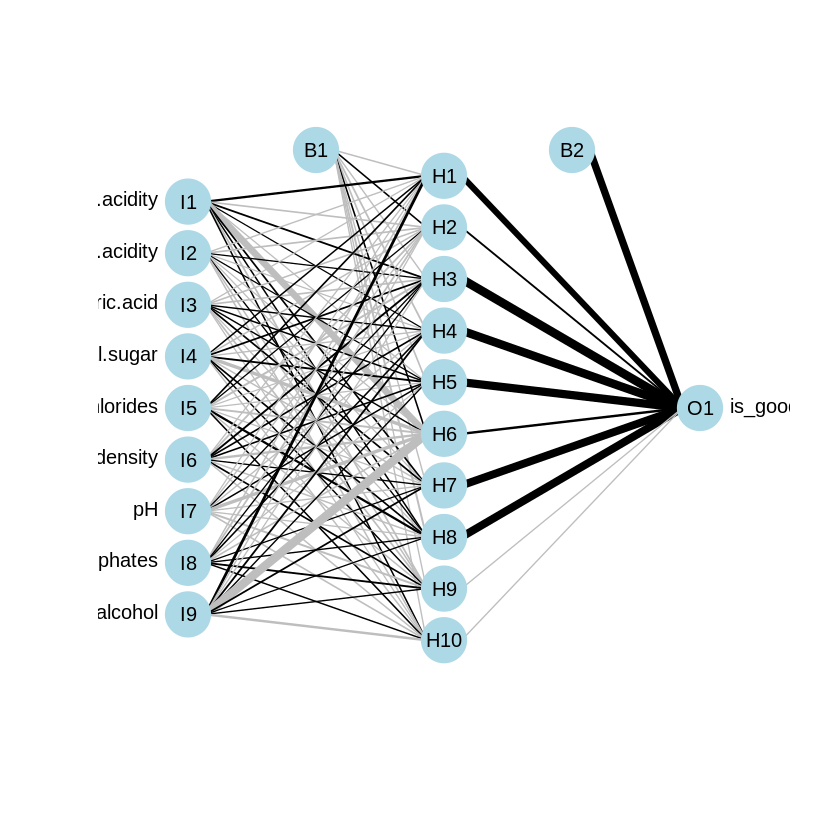

In [44]:
red <- neuralnet(
  #formula
  is_good ~ fixed.acidity + volatile.acidity + citric.acid + residual.sugar + chlorides +
    density + pH + sulphates + alcohol,
  #data
  datos_entrenamiento,
  #capas ocultas
  hidden = 10,
   #si act.fct NO debe aplicarse a la salida TRUE, de lo contrario FALSE
  linear.output = FALSE,
  #funcion de activacion
  act.fct = "logistic",
  #tipo de algoritmo
  algorithm="backprop",
  #umbral
  threshold=0.01,
  #tasa de aprendisaje
  learningrate=0.009,
  #cantidad de repeticiones
  rep=100
)
#Graficamos la mejor configuracion
plotnet(red,rep = "best")


In [51]:
# Realizamos las predicciones con el conjunto de datos de prueba
predicciones <- compute(red, datos_prueba[, -which(names(datos_prueba) == "is_good")])$net.result

In [52]:
# Convertimos las predicciones a valores binarios (0 o 1)
predicciones_binarias <- ifelse(predicciones > 0.5, 1, 0)

In [53]:
# Calculamos el error
ErrorC_RNA <- sum(predicciones_binarias != datos_prueba$is_good) / nrow(datos_prueba)
print(ErrorC_RNA)

[1] 0.5


#9. Compare los resultados obtenidos y escriba sus conclusiones.

A medidad que se iban desarrollando los puntos del practico se han realizado observaciones, las cuales se puede visualizar al pie de algunas secciones de codigo con el nombre de #OBSERVACION; en base a dichas observaciones puedo concluir lo siguiente:


En cuanto al entrenamiento con SVM puedo decir que entre mayor sea la cantidad de datos mejor es la prediccion y clasificacion del algoritmo, ademas podemos ver que este algoritmo SVM no funriona bien con dataframes desbalanceados.
En cuanto a las pruebas, se obtuvieron los siguientes resultados:
Error = 0.253803827751196 con wine_df_sin_cols
Eroor = 0.242344497607656 con wine_df_sin_outliers_total
Error = 0.243402777777778 con wine_df
Siendo:
*   wine_df: es el dataframe original con la columna casteada.
*   wine_df_sin_outliers_total: es el dataframe sin valores outliers.
*   wine_df_sin_cols: es el dataframe sin dos columnas las cuales tenian una desviacion estandar muy elevada, es decir que los datos estaban muy dispersos.
Podemos decir que para este caso el uso del dataframe sin datos outliers fue ligeramente el que menor error obtuvo es decir que su prediccion fue mejor.


En cuanto a Random Forest podemos decir que la clasificacion es mucho mejor con datos desbalanceados, es decir con el dataframe original. Se realizaron varias pruebas cambiando el conjunto de entrenamiento y probando diferentes dataframes. Se obtuvieron los siguientes resultados:

1.   P=0.7 y wine_df_sin_cols             0.201511879049676
2.   P=0.8 y wine_df_sin_cols             0.191298701298701
3.   P=0.7 y wine_df                      0.190041753653445
4.   P=0.8 y wine_df                      0.182100313479624
5.   P=0.7 y wine_df_sin_outliers_total   0.194578833693305
6.   p=0.8 y wine_df_sin_outliers_total   0.184318181818182

Siendo:
p: el conjunto de entrenamiento.
Podemos decir que para este modelo, los resultados fueron mejores para un p=0.8 y con el dataframe original. Ya que como Random Forest tiene la capacidad de manejar datos desbalanceados debido a que utiliza muestreo aleatorio lo que permite que el algoritmo tome muestras equilibradas de cada clase, ademas su algoritmo combina las predicciones de varios árboles logrando reducir la probabilidad de sobreajuste y mejora la generalización del modelo, tiene la capacidad de identificar y utilizar características relevantes en cada subconjunto de datos para construir árboles, tiende a ser menos sensible al ruido y valores atípicos en los datos. Es por esto que Random Forest es más robusto en entornos con clases desbalanceadas en comparación con algunos otros algoritmos.

En cuanto a RNA podemos decir que el principal inconveniente observado es el gran requerimiento de potencia y procesamiento llegando a tardar demasiado. Luego se han presentado problemas para lograr una covinacion de paramatros que logren la convergencia, el error observador es:

1.   neuralnet(is_good ~ fixed.acidity + volatile.acidity + citric.acid +
 .     residual.sugar + chlorides + density + pH + sulphates + alcohol,
 .     datos_entrenamiento, hidden = 10, linear.output = FALSE,
 .     act.fct = "logistic", algorithm = "backprop", threshold = 0.01,
 .     learningrate = 0.009, rep = 10)

Este error puede ocurrir debido a diferentes factores como la complejidad del modelo, la tasa de aprendizaje, el número de épocas (repeticiones) o incluso la estructura de los datos.
Para lograr la convergencia se ajusto la tasa de aprendizaje (learningrate), el número de épocas (rep), donde se llego a probar con 100 pero el tiempo de procesamiento excedia lo esperado por lo cual se opto por dejarlo en 10. Otro parametro que se puede modificar el la estructura de la red neuronal es decir el número de capas ocultas (hidden), de la siguiente forma:




* learningrate = 0.001 y 10 rep no converge
* learningrate = 0.009 y 10 rep no converge
* learningrate = 0.005 y 10 rep no converge
* learningrate = 0.0001, hidden=8 y 10 rep no converge
* learningrate = 0.01, hidden=10 y 100 rep no converge
* learningrate = 0.01, hidden=10 y 10 rep no converge
* learningrate = 0.01, hidden=10 y 8 rep no converge
* learningrate = 0.09, hidden=10 y 10 rep no converge


 Se detecta error en variable is_good que es de tipo factor se pasa a numerico y se vuelve a probar
* learningrate = 0.009, hidden=10 y 10 rep converge - error=0.5
* learningrate = 0.009, hidden=10 y 100 rep converge - error=0.5
* learningrate = 0.009, hidden=8 y 100 rep converge - error=0.5

En cuanto a la cantidad de variables y teniendo en cuenta que se trabajo sobre un dataframe limipio y balanceado para entrenar el modelo, podemos decir que: al utilizar mayor cantidad variables obtenemos mayor información, una visión más completa y detallada del problema, lo que puede ayudar al modelo a capturar patrones más complejos para lograr una mejor capacidad predictiva. Pero tambien incluir muchas variables puede llevar al modelo a ajustarse demasiado a los datos de entrenamiento y capturar ruido en lugar de patrones reales y una mayor complejidad, lo cual provoca un aumento del tiempo de procesamiento y entrenamiento.